In [1]:
from modules.graph_functions import *
import matplotlib.pyplot as plt
import networkx as nx
import itertools as it

In [72]:
N = 12
r = 4
iter_outer = 10000

In [73]:
ans = []
for i in range(iter_outer):
    adj_mat = adjacency_matrix_regular(N,r)
    found = True
    for state in it.combinations(np.arange(N),r):
        G = generate_graph(N, adj_mat)
        G.set_rules(spread,disconnect)
        genereate_given_state(G,state)
        if not G.simplify():
            found = False
            break
    if found:
        ans.append(adj_mat)
print(len(ans))

9


In [75]:
answers = np.zeros((len(ans),N,N))
for i in range(len(ans)):
    answers[i] = ans[i]
np.savetxt('answers_{}_{}.txt'.format(N,r),answers.reshape((len(ans),N**2)),fmt='%d')

In [77]:
np.savetxt('adj_matN{}_r{}.txt'.format(N,r),ans[0],fmt='%d')

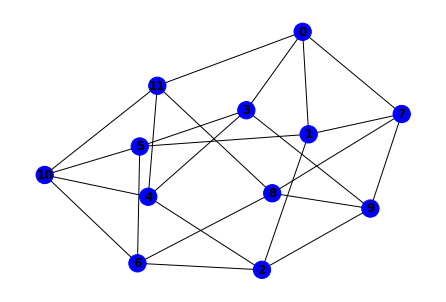

In [79]:
G = generate_graph(N, ans[2])
G.set_rules(spread,disconnect)
G.plot_graph()


In [51]:
genereate_given_state(G,[0,1,2,3])

True

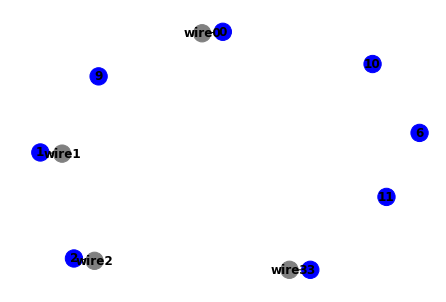

In [53]:
G.plot_graph()
G.simplify()

In [115]:
def swap(arr, a,b):
    arr[[a,b]] = arr[[b,a]]
    arr[:,[a,b]] = arr[:,[b,a]]
    return arr

In [184]:
mat = np.loadtxt('adj_matN14_r4.txt')
mat

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]])

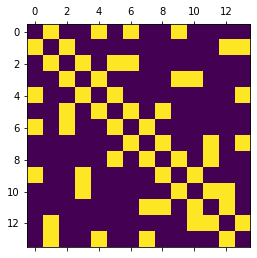

In [210]:
swap(mat,13,12)
plt.matshow(mat)

In [211]:
np.savetxt("test2.txt",mat,fmt='%d')